# k-Mean Clustering on a color image

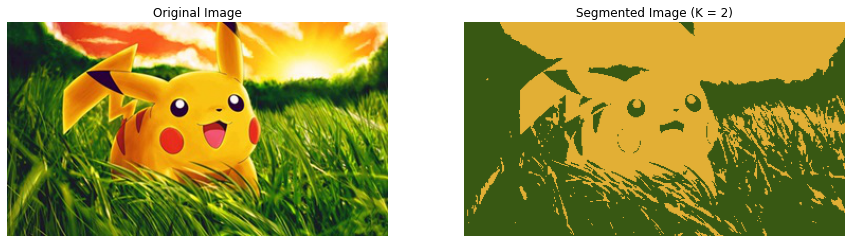

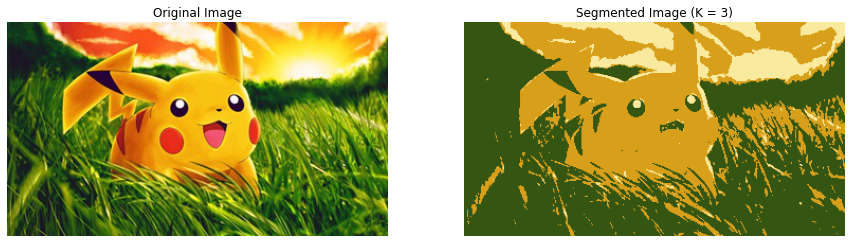

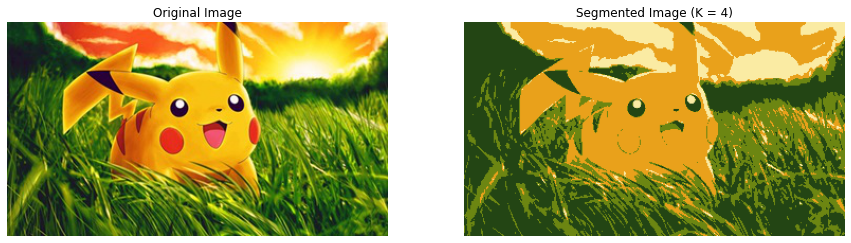

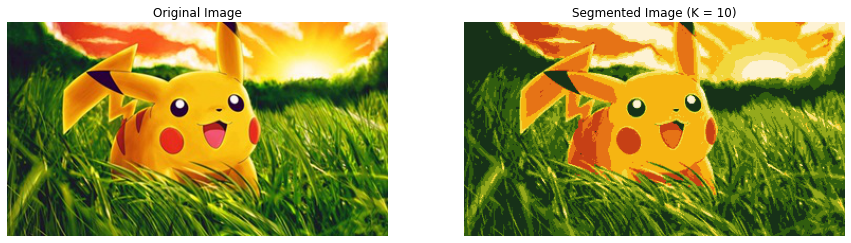

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Define K-Means clustering algorithm
def kmeans(image, k, max_iter=100):
    # Flatten the image
    pixels = np.reshape(image, (-1, 3))

    # Initialize centroids randomly
    centroids = pixels[np.random.choice(pixels.shape[0], k, replace=False)]

    for _ in range(max_iter):
        # Assign each pixel to the nearest centroid
        distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([pixels[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    # Assign each pixel to the value of its nearest centroid
    segmented_image = centroids[labels].reshape(image.shape)

    return segmented_image

# Load the image
image = Image.open(r"D:\1st_Year_QMS\2nd_Sem\PR\pikachu.jpg")
image = np.array(image)

# Perform K-Means clustering
k = [2, 3, 4, 10]  # Number of clusters

for i in range(len(k)):
    segmented_image = kmeans(image, k[i])

    # Display original and segmented images
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original Image")
    plt.imshow(image)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Segmented Image (K = {})".format(k[i]))
    plt.imshow(segmented_image.astype(np.uint8))
    plt.axis('off')

plt.show()